### Web-Scraping (Day 1)
Using Spotify API to visualise playlist description


Group: Desha Elliott, Hamida Khatri, Shrabani Ghosh, Stephen Abeyta, Germans Savcisens

In [72]:
import pandas as pd
import re
import nltk
!pip install wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string
from nltk.tokenize import wordpunct_tokenize
from nltk import word_tokenize
punctuation = list(string.punctuation)
stowords_set = set(stopwords.words('english'))
punctuation = punctuation + ["”", "’", "‘", "“"]
punct = set (punctuation)
import numpy as np
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
import networkx as nx #popular network libaray
from networkx.algorithms.components import connected_components
from collections import Counter
from nltk import chunk

def remove_html_tags(text):
    """Return the plain text without HTML tags using regex."""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)


In [50]:
#### COnnect to Spotify and extract plylists for the country ####
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '6b982aa750004a55a69e6ccd66e6b5cf'
client_secret = '24ca5b3b94c64a37a01bc2a9f4965bf2'

# set up the client credentials manager
# set up the client credentials manager
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

countries = ["IN", "CH", "US"]
data = []
for country in countries:
    playlists = sp.category_playlists(category_id='gaming', country='US', limit=50, offset=0)
    for playlist in playlists['playlists']['items']:
        data.append({"country": country, "name": playlist['name'], "description": remove_html_tags(playlist["description"])})

In [75]:
# Create a dataframe from the data we collected
# Clean the data
df = pd.DataFrame(data)
#In the category
df ['text_lower'] = df['description'].str.lower()
df.loc[:,'tokenized'] = df['text_lower'].copy().apply(lambda article: word_tokenize(article))# if pd.isnull(article) else [])
df.loc[:,'tokenized_stop'] = df['tokenized'].apply(lambda x: [e for e in x if e not in stowords_set])
df.loc[:,'tokenized_punct'] = df['tokenized_stop'].apply(lambda x: [e for e in x if e not in punct])
df.loc[:,'tokenized_stemmed'] = df['tokenized_punct'].apply(lambda x: stemming(x))
df.to_csv("gaming_clean.csv", index=False)

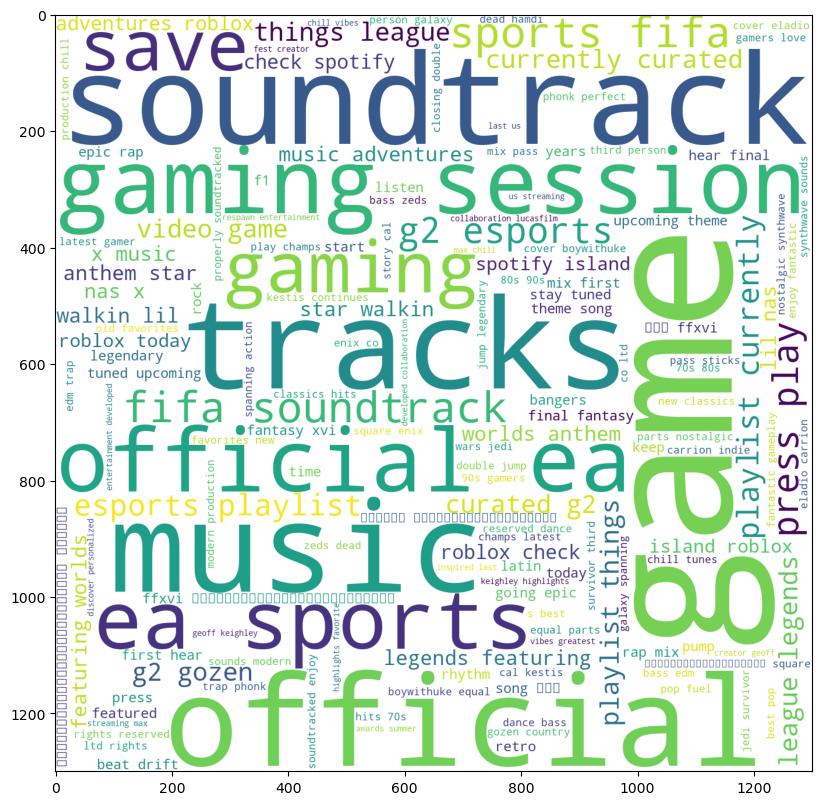

In [114]:
### Merge all the text into one string
from functools import reduce

out = " ".join(reduce(lambda xs, ys: xs + ys, df["tokenized_punct"].values.tolist()))
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a WordCloud object
wordcloud = WordCloud(width = 1300, height = 1300,
                      background_color ="white",
                      stopwords = None,
                      min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
plt.show()

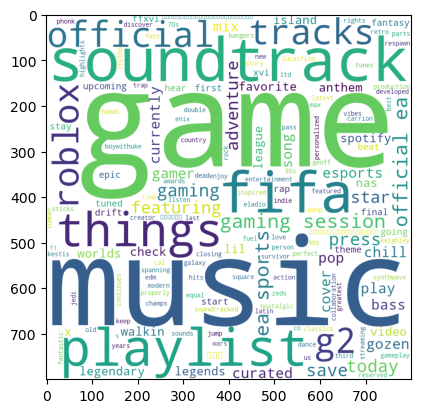

In [107]:
out = " ".join(reduce(lambda xs, ys: xs + ys, df[df["country"]=="IN"]["tokenized_punct"].values.tolist()))
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ="white",
                      stopwords = None,
                      min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
plt.show()


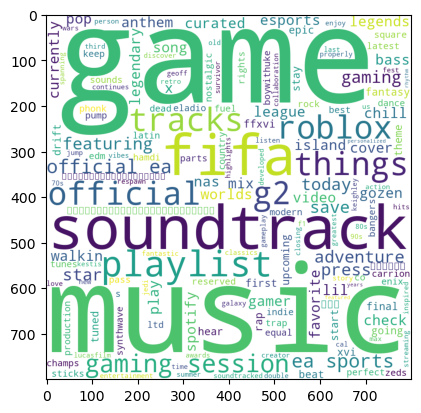

In [108]:
out = " ".join(reduce(lambda xs, ys: xs + ys, df[df["country"]=="US"]["tokenized_punct"].values.tolist()))
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ="white",
                      stopwords = None,
                      min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
plt.show()


# Archive

In [67]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import langid
import string

def clean_text(text):
    # tokenize the text
    words = nltk.word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # remove non-english words
    words = [word for word in words if langid.classify(word)[0] == 'en']

    # remove punctuation
    words = [''.join(c for c in w if c not in string.punctuation) for w in words]
    words = [word for word in words if word]  # remove empty strings

    # join the words back into a single string
    text = " ".join(words)
    return text

[nltk_data] Downloading package punkt to /home/carlomarx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/carlomarx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
clean_text(" ".join(df[df["country"]== "IN"]["description"].values).lower())

'beat drift press play press start get gaming session going epic rap mix first hear final xvi stay upcoming theme song square enix co ltd rights reserved dance bass edm trap phonk perfect gaming mix pass sticks press play champs latest gamer music today s best pop gaming cover boywithuke equal parts synthwave sounds modern production chill gaming session things bass zeds dead hamdi g2 esports playlist currently curated g2 country tracks pump gaming rock game latin music gaming session cover eladio carrion music keep gaming session properly gameplay kpop music would like save closing video game featuring old favorites new classics hits 70s 80s 90s gamers love things retro playlist things league featuring worlds anthem star walkin x music adventures roblox check spotify island roblox today ea sports 23 ea sports f1 23 story cal kestis continues star wars jedi third person galaxyspanning actionadventure game respawn entertainment developed lucasfilm games g2 esports playlist currently cur